<a href="https://colab.research.google.com/github/Tstrebe2/predicting-text-difficulty/blob/tim-updates/tim-dchall-eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dale Chall Word List EDA

In [1]:
import sys

!{sys.executable} -m pip install spacy -U -q
!{sys.executable} -m spacy download en_core_web_lg -q

2022-09-26 01:59:15.307093: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
     |████████████████████████████████| 587.7 MB 9.0 kB/s 
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


In [2]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

In [18]:
urls = ['https://raw.githubusercontent.com/Tstrebe2/predicting-text-difficulty/main/assets/dale_chall.txt',
        'https://raw.githubusercontent.com/Tstrebe2/predicting-text-difficulty/main/assets/WikiLarge_Lemmatized_Train.csv']

d_chall = requests.get(urls[0]).text.split('\r')

wiki_df_train = pd.read_csv(urls[1])

In [24]:
import spacy

nlp = spacy.load('en_core_web_lg')

d_chall = set([w for w in [w.lemma_.lower() for w in nlp(' '.join(d_chall))] if w not in set([' ', '-', '  '])])

In [25]:
tokenizer = lambda x: x.split(' ')
vectorizer = CountVectorizer(tokenizer=tokenizer)
X = vectorizer.fit_transform(wiki_df_train['lemmatized_text'])

In [26]:
feature_array = np.array(vectorizer.get_feature_names_out())
ix = np.where(np.array([True if f in d_chall else False for f in feature_array]))[0]
wiki_df_train['d_chall'] = np.array(X[:, ix].sum(axis=1))/np.array(X.sum(axis=1))

In [ ]:
wiki_df_train

,original_text,label,d_chall
0,There is manuscript evidence that Austen conti...,1,0.488372
1,"In a remarkable comparative analysis , Mandaea...",1,0.260870
2,"Before Persephone was released to Hermes , who...",1,0.565217
3,Cogeneration plants are commonly found in dist...,1,0.256410
4,"Geneva -LRB- , ; , ; , ; ; -RRB- is the second...",1,0.361111
...,...,...,...
416763,A Duke Nukem 3D version has been sold for Xbox...,0,0.411765
416764,"However , it is becoming replaced as a method ...",0,0.500000
416765,There are hand gestures in both Hindu and Budd...,0,0.545455
416766,"If it is necessary to use colors , try to choo...",0,0.619048


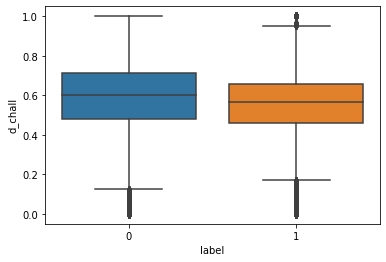

In [27]:
import seaborn as sns

sns.boxplot(data=wiki_df_train, x='label', y='d_chall')

In [28]:
[w for w in d_chall if w not in feature_array]

['armful',
 'catbird',
 'cluck',
 'firecracker',
 'housetop',
 'haystack',
 'wrung',
 'downstairs',
 'housework',
 'carload',
 'drowsy',
 'bobwhite',
 'mamma',
 'waken',
 'bedspread',
 'awfully',
 'cozy',
 'carelessness',
 'coffeepot',
 'hayfield',
 'bedbug',
 'thanksgive',
 'ouch',
 'clang',
 'homely',
 'stillness',
 'coop',
 '  ',
 'cob',
 'redbreast',
 'hark',
 'redbird',
 'gobble',
 'mailman',
 'rosebud',
 'flowery',
 'thimble',
 'mend',
 'schoolroom',
 'beefsteak',
 'cranky',
 'doorknob',
 'cupful',
 'tardy',
 'tinkle',
 'hunk',
 'catsup',
 'hurrah',
 'tiptoe',
 'woolen',
 'rowboat',
 'chilly',
 'bookcase',
 'groan',
 'wre',
 'gladly',
 'pocketbook',
 'codfish',
 'buttonhole',
 'cackle',
 'croak',
 'mailbox']